In [41]:
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
# from lightgbm import LGBMRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt


In [42]:
dataTrain =pd.read_csv('/data/workspace_files/FlightPrice/Data_train.csv')
pd.set_option('display.max_columns', None)
dataTrain


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [43]:
dataTest = pd.read_csv('/data/workspace_files/FlightPrice/test_set_csv.csv')
pd.set_option('display.max_columns', None)
dataTest

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


In [44]:
#General Exploration
dataTrain["Airline"].value_counts()

Jet Airways 3849
IndiGo 2053
Air India 1752
Multiple carriers 1196
SpiceJet 818
Vistara 479
Air Asia 319
GoAir 194
Multiple carriers Premium economy 13
Jet Airways Business 6
Vistara Premium economy 3
Trujet 1
Name: Airline, dtype: int64

In [45]:
dataTrain["Date_of_Journey"].value_counts()

18/05/2019 504
6/06/2019 503
21/05/2019 497
9/06/2019 495
12/06/2019 493
9/05/2019 484
21/03/2019 423
15/05/2019 405
27/05/2019 382
27/06/2019 355
24/06/2019 351
1/06/2019 342
3/06/2019 333
15/06/2019 328
24/03/2019 323
6/03/2019 308
27/03/2019 299
24/05/2019 286
6/05/2019 282
1/05/2019 277
12/05/2019 259
1/04/2019 257
3/03/2019 218
9/03/2019 200
15/03/2019 162
18/03/2019 156
01/03/2019 152
12/03/2019 142
9/04/2019 125
3/04/2019 110
21/06/2019 109
18/06/2019 105
09/03/2019 102
6/04/2019 100
03/03/2019 97
06/03/2019 95
27/04/2019 94
24/04/2019 92
3/05/2019 90
15/04/2019 89
21/04/2019 82
18/04/2019 67
12/04/2019 63
1/03/2019 47
Name: Date_of_Journey, dtype: int64

In [46]:
dataTrain["Source"].value_counts()

Delhi 4537
Kolkata 2871
Banglore 2197
Mumbai 697
Chennai 381
Name: Source, dtype: int64

<Axes: >

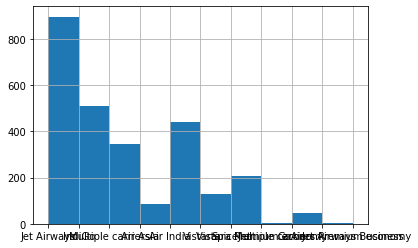

In [47]:
dataTest['Airline'].hist()

<Axes: >

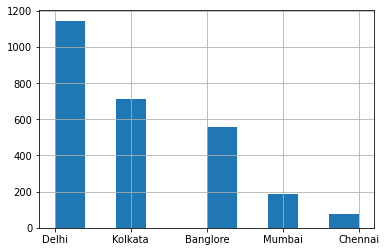

In [48]:
dataTest['Source'].hist()

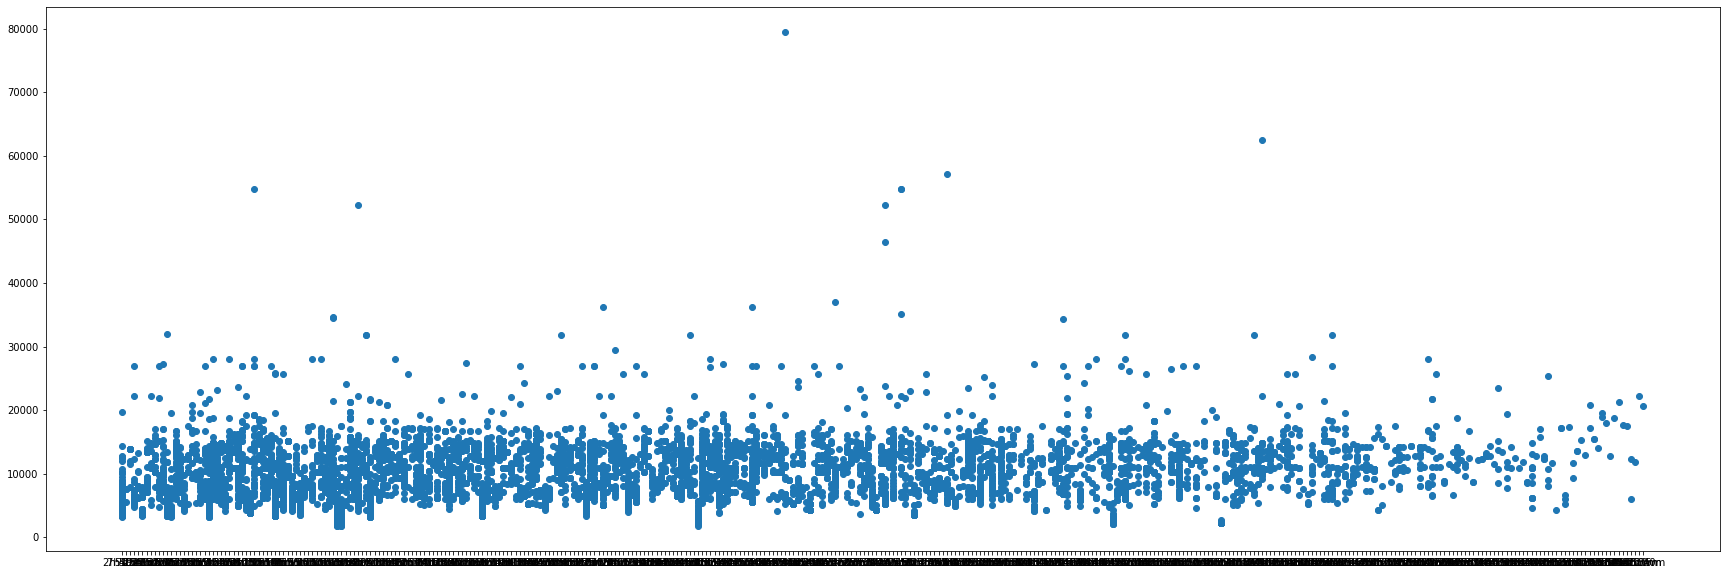

In [49]:
plt.figure(figsize = (30,10))
plt.scatter(dataTrain.Duration, dataTrain.Price)
#no relationship between Price and Duration?

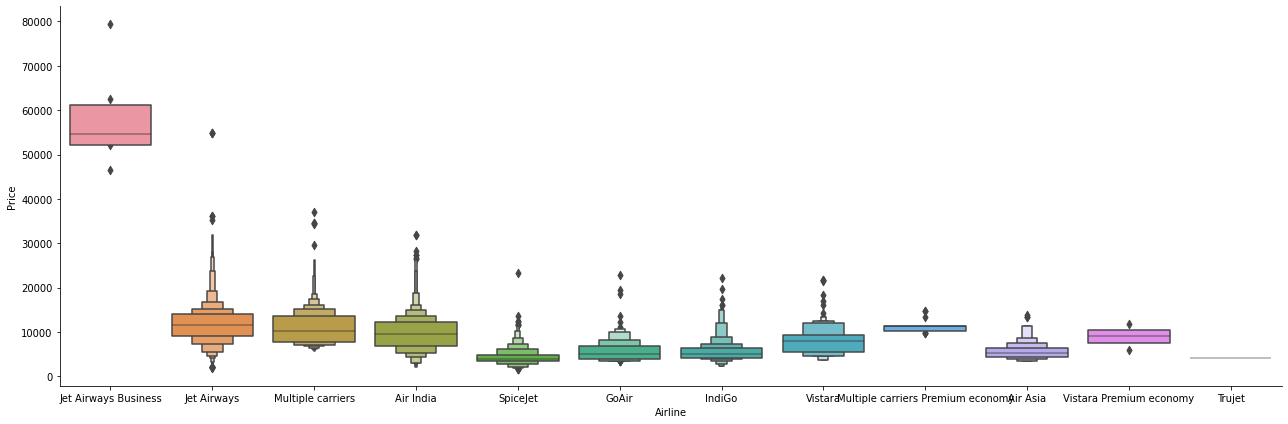

In [50]:
sns.catplot(y = "Price", x = "Airline", data = dataTrain.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

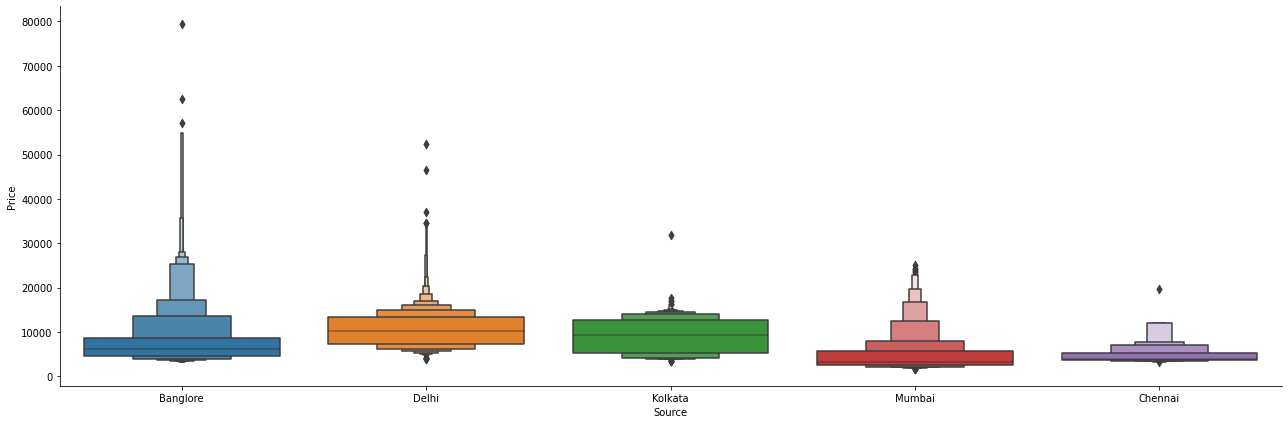

In [51]:
sns.catplot(y = "Price", x = "Source", data = dataTrain.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

In [52]:
#variable reformatting: Duration, Date etc...
#Duration
duration = dataTrain.Duration
print(duration)
minutes = []
layerOne= []
layerTwo = []
misc = []
misc2 = []
a=0
b=0
c=0

0        2h 50m
1        7h 25m
2           19h
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680        3h
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10683, dtype: object


In [75]:
# Duration Conversion
for i in range (len(duration)):
    layerOne = duration[i].split(" ")
    for j in range (len(layerOne)):


        layerTwo = list(layerOne[j])
        if layerTwo[-1] == "h":
            if len(layerTwo) == 3:
                a += int(layerTwo[0]) * 600
                a += int(layerTwo[1]) * 60
            elif len(layerTwo) == 2:
                a += int(layerTwo[0]) * 60
            misc.append(a)

        elif layerTwo[-1] == "m":
            if len(layerTwo) == 3:
                b += int(layerTwo[0]) * 10
                b += int(layerTwo[1])
            elif len(layerTwo)==2:
                b += int(layerTwo[0])
            misc2.append(b)
    
    minutes.append(a+b)
    a = 0
    b = 0

        

In [54]:
dataTrain['minutes'] = minutes 
dataTrain= dataTrain.drop("Duration", axis= "columns")

In [55]:

# Total Stops Conversion
totalStops = dataTrain.Total_Stops
totalStops = totalStops.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4})
dataTrain['totalStops'] = totalStops
dataTrain = dataTrain.drop("Total_Stops", axis = "columns")

In [56]:
#date conversions
dataTrain["Flightday"] = pd.to_datetime(dataTrain.Date_of_Journey, format="%d/%m/%Y").dt.day
dataTrain["Flightmonth"] = pd.to_datetime(dataTrain["Date_of_Journey"], format = "%d/%m/%Y").dt.month
dataTrain = dataTrain.drop("Date_of_Journey", axis = "columns")

In [57]:
dataTrain = dataTrain.drop("Additional_Info", axis = "columns")

In [58]:
# data Test set refactoring
durationTest = dataTest.Duration
print(durationTest)
minutesTest = []
layerOneTest= []
layerTwoTest = []
miscTest = []
misc2Test = []
aTest=0
bTest=0
cTest=0

0       10h 55m
1            4h
2       23h 45m
3           13h
4        2h 50m
         ...   
2666    23h 55m
2667     2h 35m
2668     6h 35m
2669    15h 15m
2670    14h 20m
Name: Duration, Length: 2671, dtype: object


In [59]:
# Duration Conversion
for i in range (len(durationTest)):
    layerOneTest = durationTest[i].split(" ")
    for j in range (len(layerOneTest)):


        layerTwoTest = list(layerOneTest[j])
        if layerTwoTest[-1] == "h":
            if len(layerTwoTest) == 3:
                aTest += int(layerTwoTest[0]) * 600
                aTest += int(layerTwoTest[1]) * 60
            elif len(layerTwoTest) == 2:
                aTest += int(layerTwoTest[0]) * 60
            miscTest.append(aTest)

        elif layerTwoTest[-1] == "m":
            if len(layerTwoTest) == 3:
                bTest += int(layerTwoTest[0]) * 10
                bTest += int(layerTwoTest[1])
            elif len(layerTwoTest)==2:
                bTest += int(layerTwoTest[0])
            misc2Test.append(bTest)
    
    minutesTest.append(aTest+bTest)
    aTest = 0
    bTest = 0

In [60]:
dataTest['minutes'] = minutesTest 
dataTest= dataTest.drop("Duration", axis= "columns")

In [61]:
totalStopsTest = dataTest.Total_Stops
totalStopsTest = totalStops.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4})
dataTest['totalStops'] = totalStopsTest
dataTest = dataTest.drop("Total_Stops", axis = "columns")

In [62]:
#date conversions
dataTest["Flightday"] = pd.to_datetime(dataTest.Date_of_Journey, format="%d/%m/%Y").dt.day
dataTest["Flightmonth"] = pd.to_datetime(dataTest["Date_of_Journey"], format = "%d/%m/%Y").dt.month
dataTest = dataTest.drop("Date_of_Journey", axis = "columns")

In [63]:
dataTest = dataTest.drop("Additional_Info", axis = "columns")

In [64]:
dataTrain = dataTrain.dropna()
dataTest = dataTest.dropna()

In [65]:
# dataTrain.columns

In [66]:
non_numeric_columns = dataTrain.select_dtypes(exclude=['int', 'float'])
non_numeric_columns.columns

le = LabelEncoder()

for column in non_numeric_columns.columns:
    dataTrain[column] = le.fit_transform(dataTrain[column])
    dataTest[column] = le.fit_transform(dataTest[column])
    

dataTrain.sample(10)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Price,minutes,totalStops,Flightday,Flightmonth
303,4,2,1,116,27,408,10368,1375,2.0,6,6
757,4,3,0,66,198,1043,10031,1260,1.0,24,3
3396,6,2,1,111,46,1260,9646,925,1.0,9,6
231,1,3,0,64,193,1305,4460,155,0.0,12,4
3690,6,2,1,104,77,284,7888,930,1.0,21,5
7709,3,3,0,64,132,1024,4174,150,0.0,9,4
9412,4,2,1,104,176,432,12898,550,1.0,27,5
8830,8,3,0,64,44,693,3841,155,0.0,27,4
1943,1,0,2,18,35,611,8273,165,0.0,24,5
5427,4,3,0,66,145,460,10844,730,1.0,24,5


In [67]:
y = dataTrain['Price']
X = dataTrain.drop('Price', axis= "columns")

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [69]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_predict = lr.predict(X_test)

mse = mean_squared_error(y_test, y_predict)

predictions_df = pd.DataFrame()

predictions_df['Actual_Price'] = y_test.reset_index(drop=True)
#print(mse)

print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))
#   :(



0.4338366413193725
0.43949475630788704


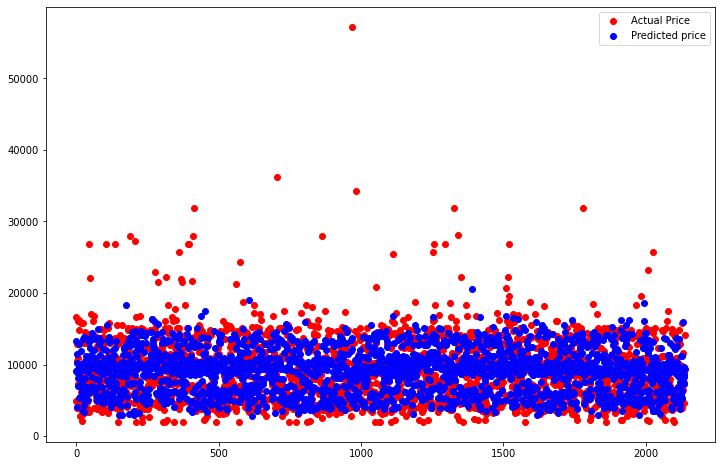

In [70]:
plt.figure(figsize=(12, 8))
plt.scatter(predictions_df.index, predictions_df['Actual_Price'], color='red', label='Actual Price', marker='o')
plt.scatter(predictions_df.index, y_predict, color='blue', label='Predicted price', marker='o')
plt.legend()

In [76]:
rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)
y_predictf = rfr.predict(X_test)

msef = mean_squared_error(y_test, y_predict)

predictions_df = pd.DataFrame()

predictions_df['Actual_Price'] = y_test.reset_index(drop=True)

#print(msef)
print(rfr.score(X_train, y_train))
print(rfr.score(X_test,y_test))



0.9535264057124626
0.7957983001107456


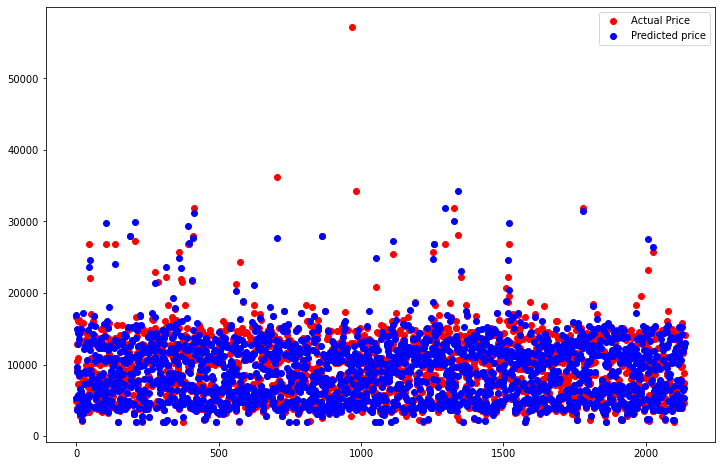

In [72]:
plt.figure(figsize=(12, 8))
plt.scatter(predictions_df.index, predictions_df['Actual_Price'], color='red', label='Actual Price', marker='o')
plt.scatter(predictions_df.index, y_predictf, color='blue', label='Predicted price', marker='o')
plt.legend()

<ipython-input-73-b3af8380d9a7>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-y_predictf)


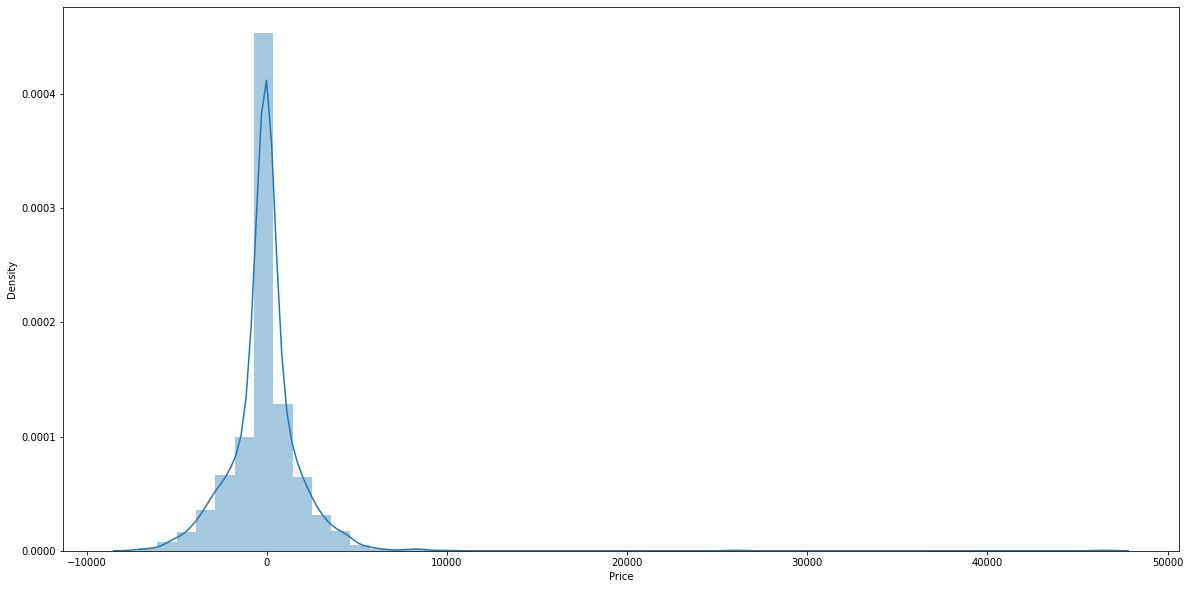

In [73]:
plt.figure(figsize=(20,10))
sns.distplot(y_test-y_predictf)
plt.show()

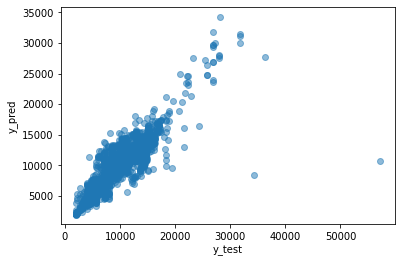

In [74]:
plt.scatter(y_test, y_predictf, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()